In [72]:
import pandas as pd
pd.options.display.max_columns = 1000
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance, plot_tree
import pickle

In [73]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

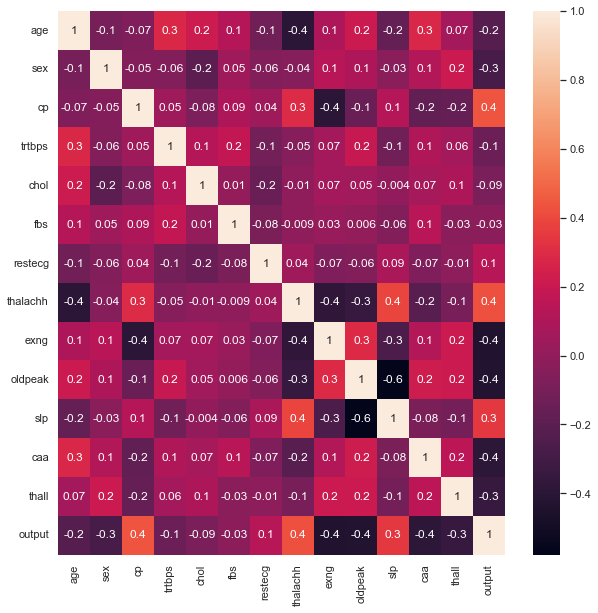

In [74]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(df.corr(), annot = True,  fmt='.1g')

In [ ]:
df = df.drop[['chol','chol','chol','chol']]

In [77]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [78]:
X = df.drop('output', axis=1)
y = df['output']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=32,
                                                    stratify=y)

In [98]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,stratify=y_test)

In [99]:
xgb_cls = XGBClassifier()
xgb_cls.fit(X_train, y_train)
y_pred = xgb_cls.predict(X_test)
print(confusion_matrix(y,xgb_cls.predict(X)))
print(classification_report(y_val,xgb_cls.predict(X_val)))
print(accuracy_score(y_val,xgb_cls.predict(X_val)))

[[131   7]
 [  3 162]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.89      0.89      0.89         9

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16

0.875
